In [2]:
import numpy as np
import matplotlib.pyplot as plt
from postprocess import stitch_corr_matrix
import h5py
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.tri as mtri

In [80]:
corrm = stitch_corr_matrix('C:\\Users\\akumar\\nse\\ACTIV\\data')

In [9]:
# Arrange correlations by spatial location
# Grab the electrode locations
f = h5py.File('RM1_p45_day4_trial_1_PAINT.mat', 'r')

In [47]:
phi = np.zeros(f['cfg_PAINT_cond']['chanlocs']['sph_phi'].size)
theta = np.zeros(phi.shape)
radius = np.zeros(phi.shape)
for i, ref in enumerate(f['cfg_PAINT_cond']['chanlocs']['sph_phi']):
    phi_ref = ref[0]
    theta_ref = f['cfg_PAINT_cond']['chanlocs']['sph_theta'][i][0]
    radius_ref = f['cfg_PAINT_cond']['chanlocs']['sph_radius'][i][0]
    
    phi[i] = f[phi_ref][0][0] * np.pi/180
    theta[i] = f[theta_ref][0][0] * np.pi/180
    radius[i] = f[radius_ref][0][0]
    
# Convert from spherical to Cartesian coordinates
x = radius * np.sin(phi) * np.cos(theta)
y = radius * np.sin(phi) * np.sin(theta)
z = radius * np.cos(phi)

# Stereographic projection
X = x/(1 -z)
Y = y/(1 - z)

In [170]:
# Divide frequencies into cannonical bands
freq = f['cfg_PAINT_cond']['ERSPfreq'][:]
theta_band = freq[0:4]
alpha_band = freq[4:8]
beta_band = freq[8:26]
gamma_band = freq[26::]

In [177]:
np.trace(corrm[15, :, 0:4, 0:4], axis1 = 1, axis2 = 2)

array([2.61303875, 1.39181478, 1.89450892, 2.98711488, 2.92907106,
       2.89606501, 2.27698212, 2.83216765, 2.33582367, 2.68213813,
       1.70821867, 3.03856739, 3.00055204, 1.60590804, 1.44803038,
       2.05622626, 1.93733352, 1.36818072, 2.61467922, 1.28011661,
       2.6740941 , 2.60196986, 4.        , 3.73603563, 2.6421141 ,
       2.83814755, 1.82129542, 2.54797482, 1.60923893, 2.51007195,
       2.45810312, 2.92445372, 1.77213765, 1.54243988, 1.70802536,
       2.53697216, 2.98566345, 2.3983439 , 2.841653  , 2.74779915,
       1.39729154, 2.51125554, 2.58665059, 0.64978947, 1.44647577,
       2.2891423 , 2.55642441, 1.94347387, 0.91023208, 1.75674953,
       3.16577595, 3.64555536, 3.62397274, 2.44187627, 1.85190638,
       3.64630698, 2.37935885, 2.39916803, 1.85560318, 2.52789599,
       1.53215387, 1.38769349, 2.28129855, 3.12253321, 1.56426058,
       1.70907943, 2.26830541, 2.9053167 , 2.55135707, 3.22334555,
       2.65279187, 0.56071173, 2.67732979, 1.97320909, 2.63042

In [178]:
# Average correlations for a sample point over the freqeuncy bands
theta_corr = np.trace(corrm[15, :, 0:4, 0:4], axis1 = 1, axis2 = 2)/theta_band.size
alpha_corr = np.trace(corrm[15, :, 4:8, 4:8], axis1 = 1, axis2 = 2)/alpha_band.size
beta_corr = np.trace(corrm[15, :, 8:26, 8:26], axis1 = 1, axis2 = 2)/beta_band.size
gamma_corr = np.trace(corrm[15, :, 26::, 26::], axis1 = 1, axis2 = 2)/gamma_band.size

In [176]:
def plot_mesh(vals, x, y, z):

    # Vals is (n x number of plots)
    
    triangles = mtri.Triangulation(x, y).triangles

    # Plotting
    fig = plt.figure(figsize = (15, 15))
    ax = fig.gca(projection='3d')
    cmap = plt.get_cmap('hot')
    triang = mtri.Triangulation(x, y, triangles)

    # Refine triangulation
    refiner = mtri.UniformTriRefiner(triang)
    tri_refi, z_refi = refiner.refine_field(z, subdiv = 3)   
    tri_refi, vals_refi = refiner.refine_field(vals, subdiv = 3)

    
    
    colors = np.mean(vals_refi[tri_refi.triangles], axis=1)

    collec = ax.plot_trisurf(tri_refi, z_refi, cmap=cmap, shade=False, linewidth=0., edgecolor='none', antialiased=False)
    collec.set_array(colors)
    ax.view_init(azim=0, elev=90)
    
    return fig, ax

### Plot correlation with arbitrary reference point, averaged over cannonical bands

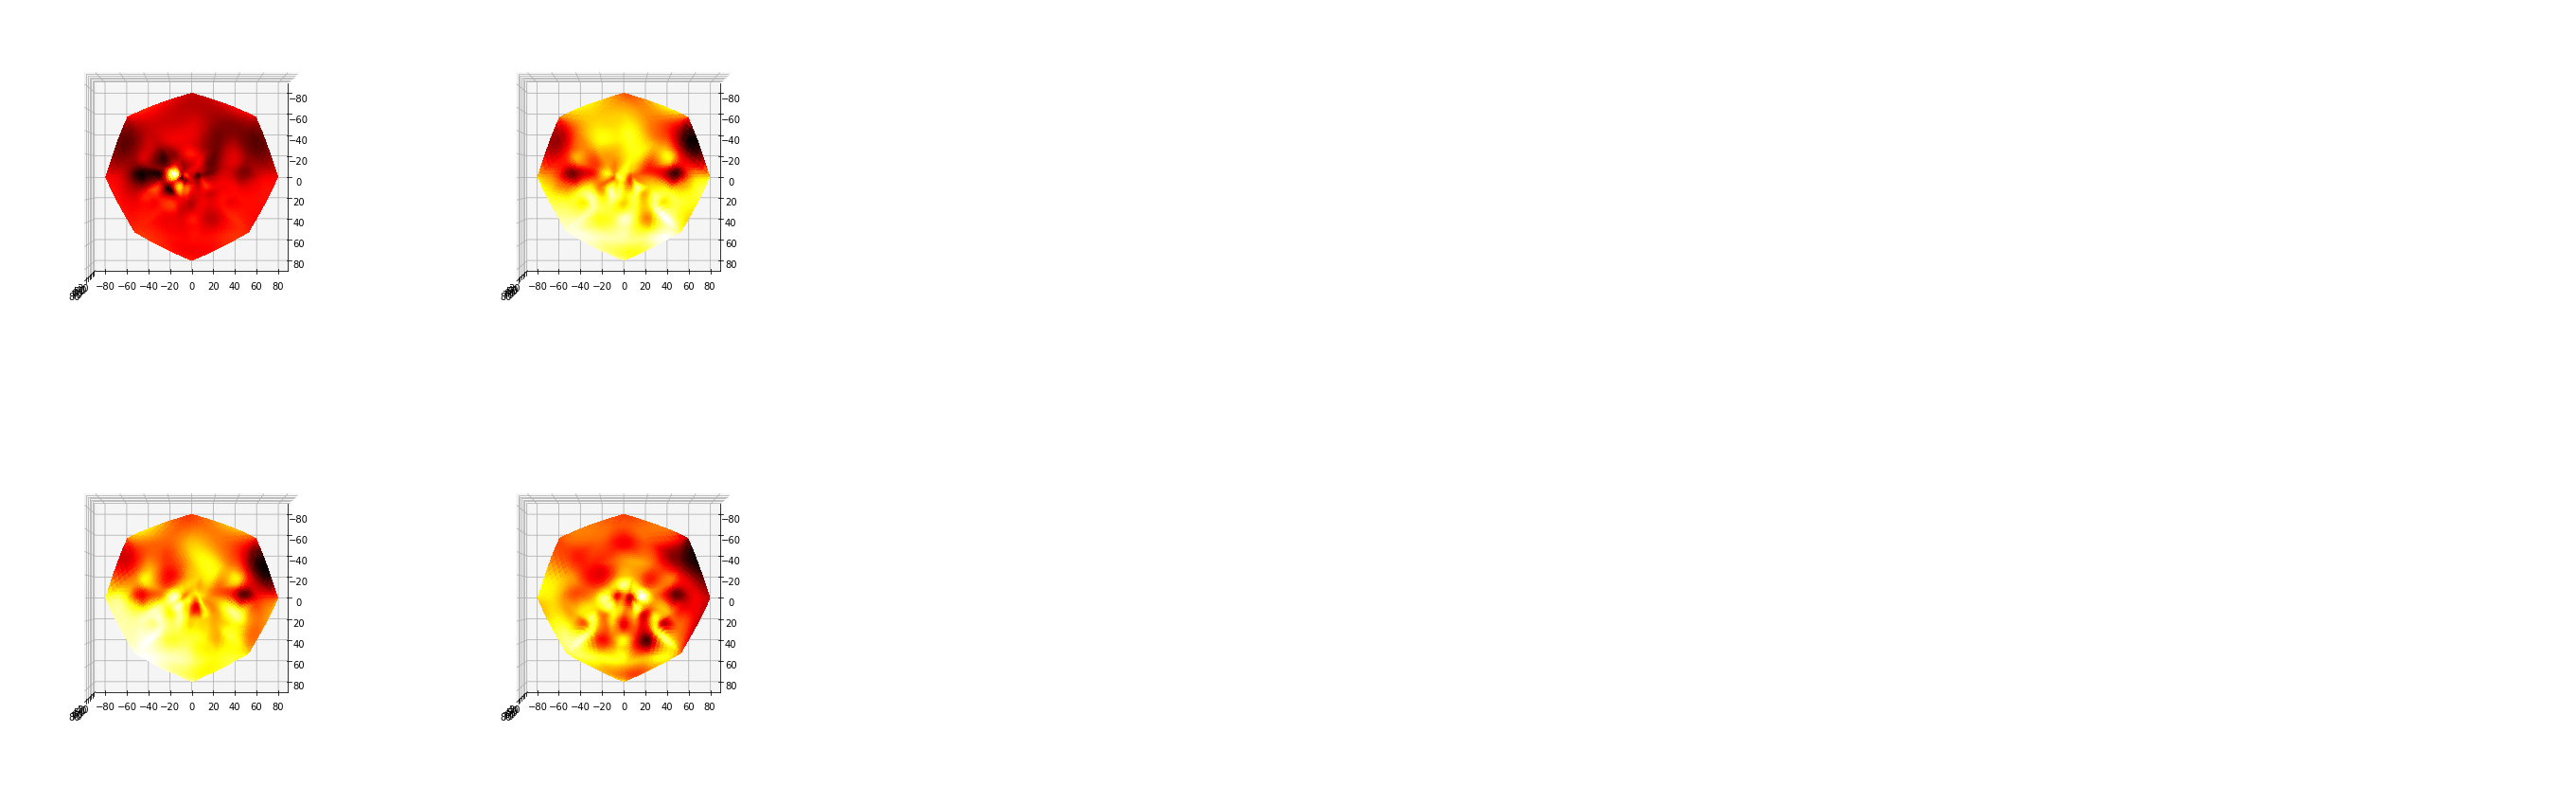

In [190]:
ref_point = 20
# Average correlations for a sample point over the freqeuncy bands
theta_corr = np.trace(corrm[ref_point, :, 0:4, 0:4], axis1 = 1, axis2 = 2)/theta_band.size
alpha_corr = np.trace(corrm[ref_point, :, 4:8, 4:8], axis1 = 1, axis2 = 2)/alpha_band.size
beta_corr = np.trace(corrm[ref_point, :, 8:26, 8:26], axis1 = 1, axis2 = 2)/beta_band.size
gamma_corr = np.trace(corrm[ref_point, :, 26::, 26::], axis1 = 1, axis2 = 2)/gamma_band.size

vals_list = [theta_corr, alpha_corr, beta_corr, gamma_corr]

triangles = mtri.Triangulation(x, y).triangles

# Plotting
fig = plt.figure(figsize = (15, 15))
triang = mtri.Triangulation(x, y, triangles)

# Refine triangulation
refiner = mtri.UniformTriRefiner(triang)
tri_refi, z_refi = refiner.refine_field(z, subdiv = 3)   

for i, val in enumerate(vals_list):

    ax = fig.add_subplot(2, 2, i + 1, projection='3d')
    cmap = plt.get_cmap('hot')
    tri_refi, vals_refi = refiner.refine_field(val, subdiv = 3)
    colors = np.mean(vals_refi[tri_refi.triangles], axis = 1)
    collec = ax.plot_trisurf(tri_refi, z_refi, cmap=cmap, shade=False, linewidth=0., edgecolor='none', antialiased=False)
    collec.set_array(colors)
    ax.scatter(x[ref_point], y[ref_point], z[ref_point] + 5, s = 30, c = 'Green')
    ax.view_init(azim=0, elev=90)
